# Micro Credit Defaulter Project

### Librirary Initialization

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [11]:
df=pd.read_csv("Micro_Credit_Defaulter_Data.csv")
pd.set_option('display.max_rows',None)
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 37 columns]

In [12]:
df.shape

(209593, 37)

We have 209593 rows and 37 columns in dataset

In [13]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

We have object string type, float type,int type value in all independent variablies and label is our target variable

In [14]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

As mentioned there are no missing values

In [15]:
df['label'].unique()

array([0, 1], dtype=int64)

In [16]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

There is a class imbalance for 2 types in this dataset.


If there is class imbalance in that case accurecy is not a good parameter to choose final model.
So we have to check for precision,recall,F1 score.

# EDA

## Univariate analysis

<AxesSubplot:xlabel='label', ylabel='count'>

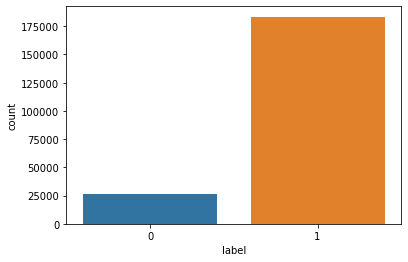

In [17]:
 sn.countplot(df['label'])

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

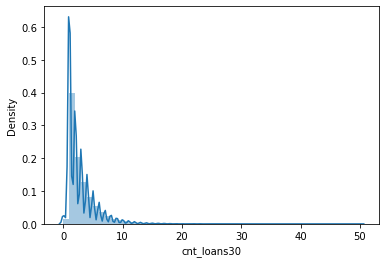

In [18]:
sn.distplot(df["cnt_loans30"])#Number of loans taken by user in last 30 days

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

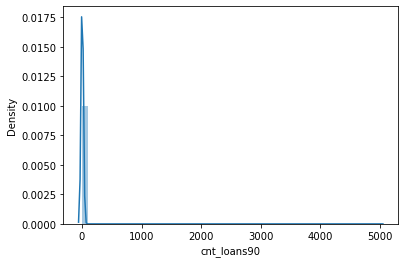

In [19]:
sn.distplot(df["cnt_loans90"])#Number of loans taken by user in last 90 days

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

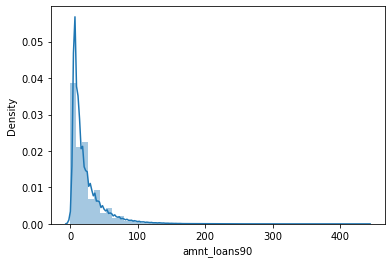

In [20]:
sn.distplot(df["amnt_loans90"])#Total amount of loans taken by user in last 90 days

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

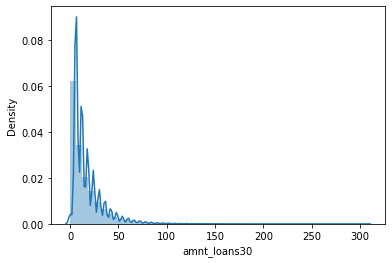

In [21]:
sn.distplot(df["amnt_loans30"])#Total amount of loans taken by user in last 30 days

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

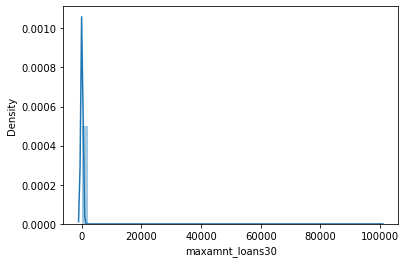

In [22]:
sn.distplot(df["maxamnt_loans30"])#maximum amount of loan taken by the user in last 30 days

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

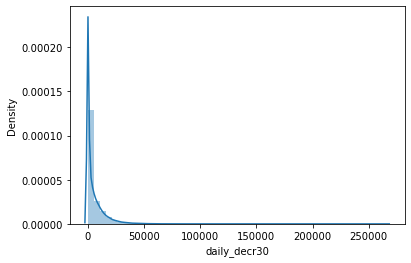

In [23]:
sn.distplot(df["daily_decr30"])#Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

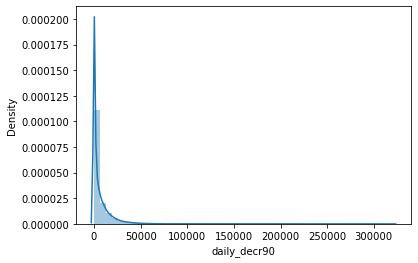

In [24]:
sn.distplot(df["daily_decr90"])#Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

<AxesSubplot:xlabel='payback30', ylabel='Density'>

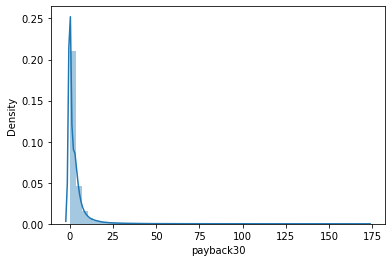

In [25]:
sn.distplot(df["payback30"])#Average payback time in days over last 30 days

<AxesSubplot:xlabel='payback90', ylabel='Density'>

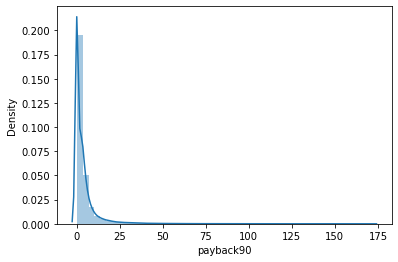

In [26]:
sn.distplot(df["payback90"])#Average payback time in days over last 90 days

<AxesSubplot:xlabel='aon', ylabel='Density'>

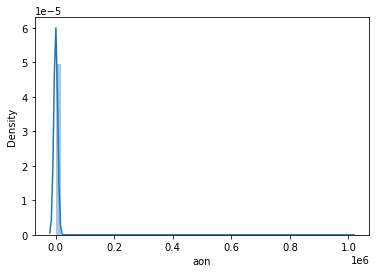

In [27]:
sn.distplot(df["aon"])#age on cellular network in days

Univariate analysis states that there is skewness in most of the datas.

### Bivariate analysis

<AxesSubplot:title={'center':'Comparision between amnt_loans30 and cnt_loans30'}, xlabel='amnt_loans30', ylabel='cnt_loans30'>

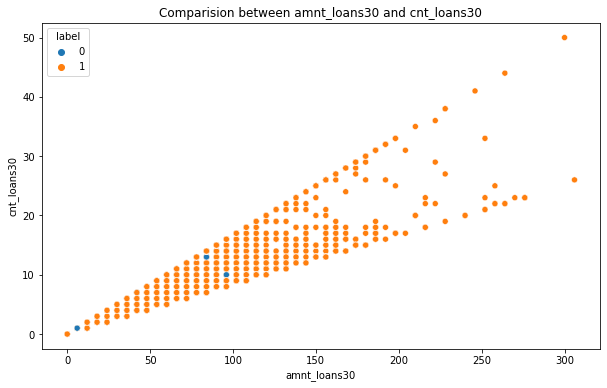

In [28]:
plt.figure(figsize=[10,6])
plt.title('Comparision between amnt_loans30 and cnt_loans30')
sn.scatterplot(df['amnt_loans30'],df['cnt_loans30'],hue=df['label'])

In [29]:
#sn.pairplot(df,hue='label')

In [30]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755200  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000       209593.00000   
mean     6082.515068    2692.581910    3483.406534         3755.84780   
std     10918.812767    4308.586781    5770.461279        53905.89223   
min       -93.012667  -23737.140000  -24720.580000          -29.00000   
25%        42.692000     280.420000     300.260000            1.00000   
50%      1500.000000    1083.570000    1334.000000            3.00000   
75%      7802.790000    3356.940000    4201.790000            7.00000   
max    320630.000000  198926.110000  200148.110000       998650.37770   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809400      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

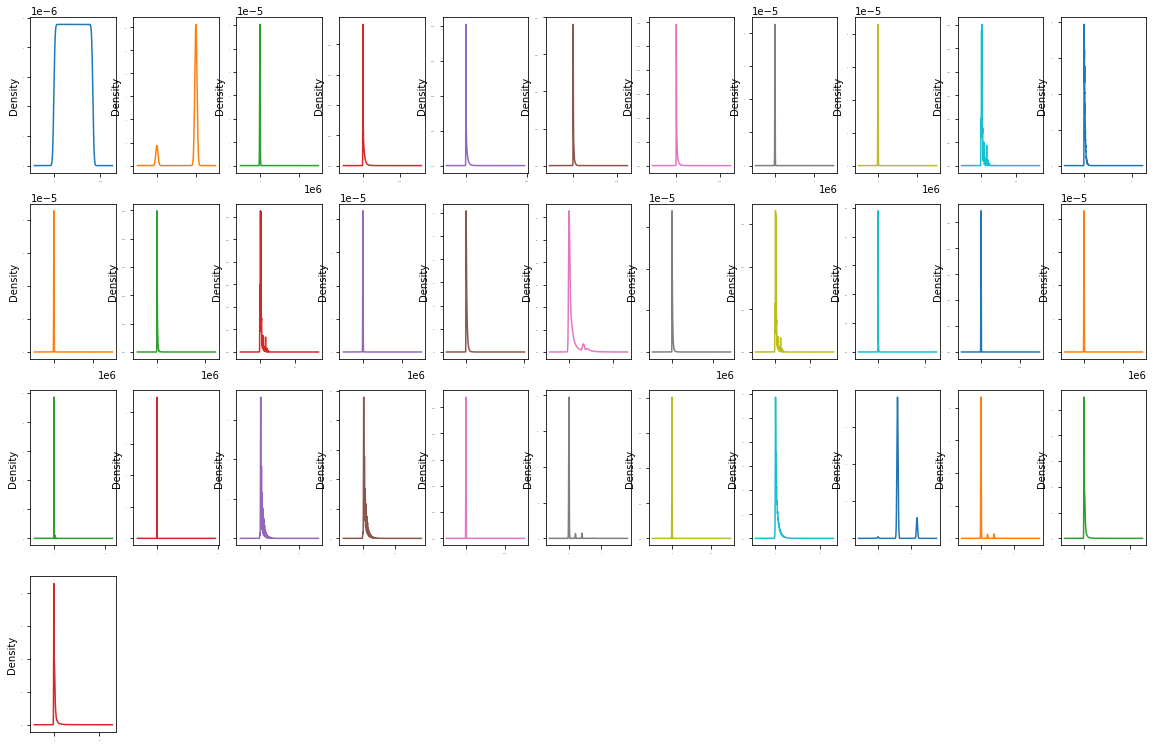

In [20]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='aon'>

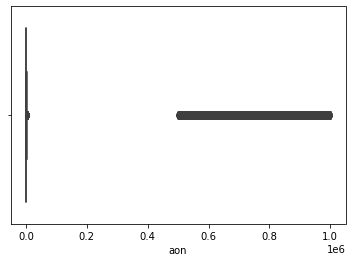

In [31]:
sn.boxplot(df['aon'])

<AxesSubplot:xlabel='daily_decr30'>

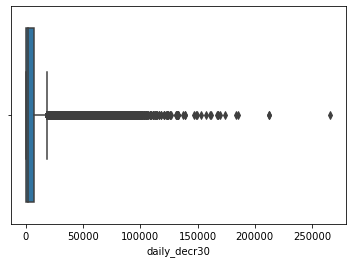

In [32]:
sn.boxplot(df['daily_decr30'])

<AxesSubplot:xlabel='daily_decr90'>

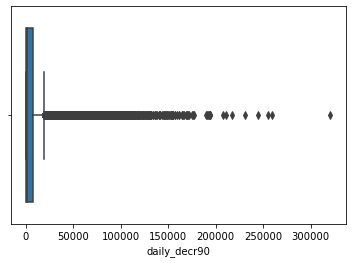

In [33]:
sn.boxplot(df['daily_decr90'])

<AxesSubplot:xlabel='daily_decr90'>

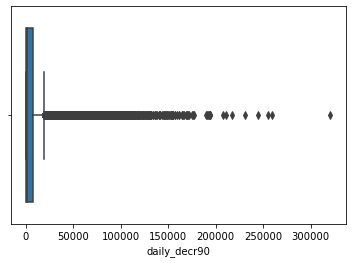

In [34]:
sn.boxplot(df['daily_decr90'])

<AxesSubplot:xlabel='rental90'>

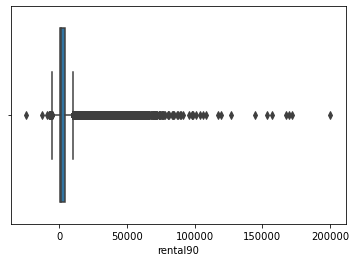

In [35]:
sn.boxplot(df['rental90'])

<AxesSubplot:xlabel='last_rech_date_ma'>

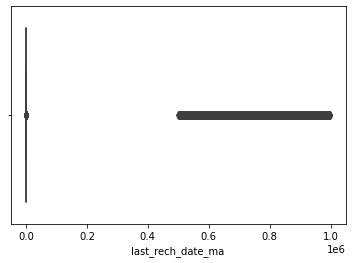

In [36]:
sn.boxplot(df['last_rech_date_ma'])

<AxesSubplot:xlabel='cnt_ma_rech30'>

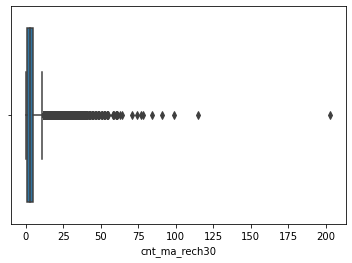

In [37]:
sn.boxplot(df['cnt_ma_rech30'])

<AxesSubplot:xlabel='cnt_ma_rech90'>

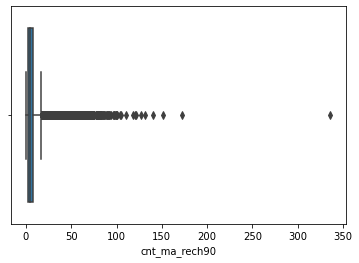

In [38]:
sn.boxplot(df['cnt_ma_rech90'])

Outliers in many columns so removing it by Zscore.

In [39]:
df_new=df.drop(columns=["pcircle","pdate","msisdn","Unnamed: 0"],axis=1)

Removing the unwanted columns which affect the accuracy.

In [40]:
df_new.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

To findout the outliers we are doing the below plots with boxplot

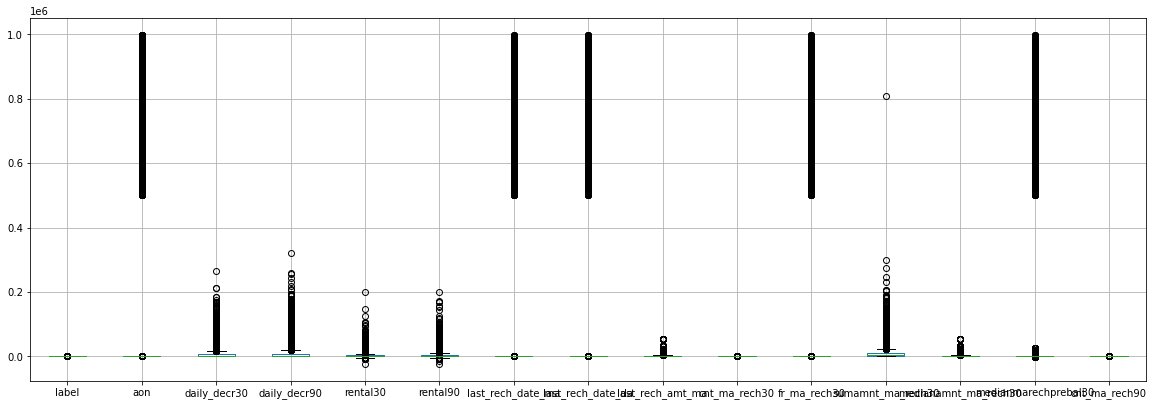

In [41]:
#plotting for first 30 columns
df_new.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

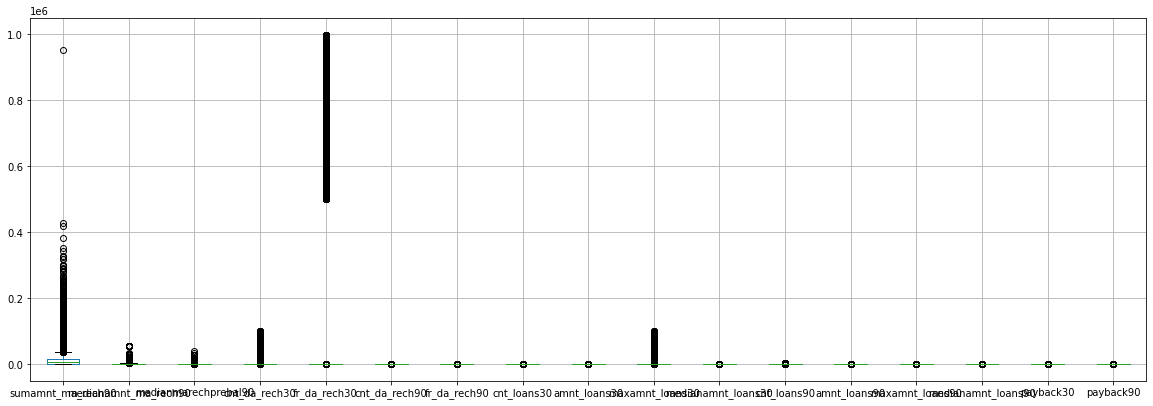

In [42]:
#plotting for next remaining columns
df_new.iloc[:,16:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We use IQR method to remove outliers since columns are with skewness and not normally distributed.

In [18]:
q1=df_new.quantile(0.25)
q3=df_new.quantile(0.75)
IQR=q3-q1
print(IQR)

label                       0.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans9

In [19]:
df_new1=df_new[~((df_new<(q1-1.5*IQR)) | (df_new>(q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)
print(df_new.shape)

(56628, 33)
(209593, 33)


In [ ]:
After doing IQR we came to know that the is lot of rows missing. so we cannot proceed with this.

In [20]:
df_new1.head()

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
2       1   535.0   1398.000000   1398.000000    900.13    900.13   
4       1   947.0    150.619333    150.619333   1098.90   1098.90   
8       1  1191.0     90.695000     90.695000   2287.50   2287.50   
9       1   536.0     29.357333     29.357333    612.96    612.96   
10      1  1511.0     12.896000     12.896000    790.44    790.44   

    last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
2                 3.0                0.0              1539              1   
4                 4.0                0.0              2309              7   
8                 1.0                0.0              1539              4   
9                11.0                0.0               773              1   
10                8.0                0.0              1539              2   

    ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
2   ...            1             6              6.0                 0.0   
4   ...            7            42              6.0                 0.0   
8   ...            4            24              6.0                 0.0   
9   ...            1             6              6.0                 0.0   
10  ...            2            12              6.0                 0.0   

    cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
2           1.0             6                6                 0.0   0.000000   
4           7.0            42                6                 0.0   2.333333   
8           4.0            24                6                 0.0   2.666667   
9           1.0             6                6                 0.0   0.000000   
10          2.0            12                6                 0.0   4.000000   

    payback90  
2    0.000000  
4    2.333333  
8    2.666667  
9    0.000000  
10   4.000000  

[5 rows x 33 columns]

Now lets try with Z score to remove outliers

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
df_new2=df_new[(z<3).all(axis=1)]

In [22]:
df_new2.shape

(161465, 33)

In [23]:
df.shape

(209593, 37)

In [24]:
209593-161465

48128

In [25]:
(48128/209593)*100

22.962598941758554

Data loss is big for up to 22%

In [ ]:
So we decide to continue with outliers

In [44]:
cor=df.corr()
cor

Unnamed: 0     label       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403 -0.002048      0.002739   
label                   0.000403  1.000000 -0.003785      0.168298   
aon                    -0.002048 -0.003785  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30             0.001725  0.196283 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.001940      0.026915   
payback90               0.002411  0.049183  0.002203      0.047175   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036

<AxesSubplot:>

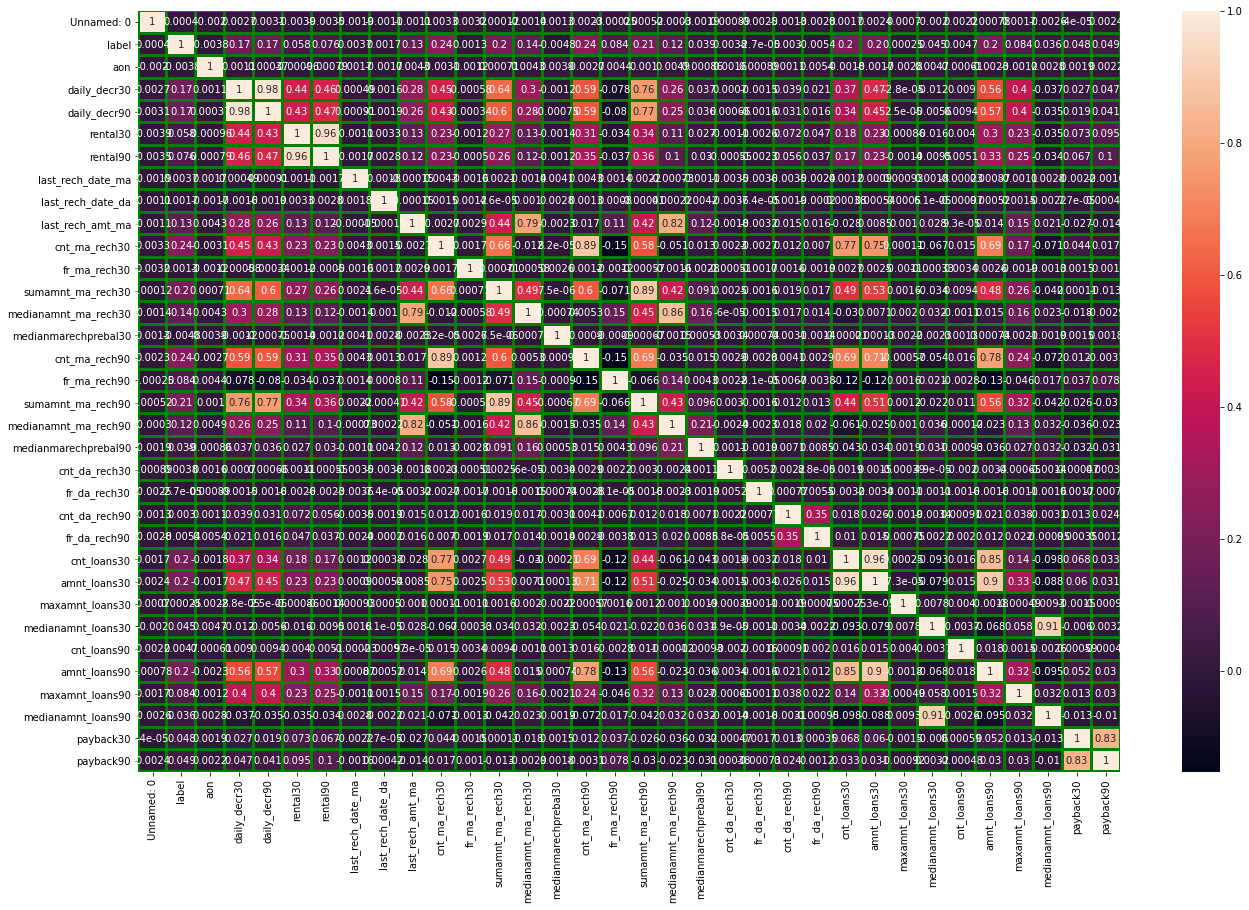

In [45]:
plt.figure(figsize=[22,14])
sn.heatmap(cor,annot=True,linewidths=2,linecolor='green')

In [48]:
corr_matrix=df_new.corr()
corr_matrix["label"].sort_values(ascending=False)


label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

In [49]:
df_new.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [74]:
from sklearn.preprocessing import power_transform
df_new2=power_transform(df_new)
df_new2=pd.DataFrame(df_new2,columns=df_new.columns)

df_new2.skew()

We get Output variable with negative correlation.

In [76]:
df_new.shape

(209593, 33)

In [80]:
#Splitting the independent variables and the Target variables in x & y
x=df_new.drop("label",axis=1)
y=df_new["label"]

Proceeding with the same df with unwanted removed columns

In [81]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [82]:
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                0.0              1539              2          21.0  ...   
1                0.0              5787              1           0.0  ...   
2                0.0              1539              1           0.0  ...   
3                0.0               947              0           0.0  ...   
4                0.0              2309              7           2.0  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 32 columns]

In [83]:
x.shape

(209593, 32)

In [84]:
y.shape

(209593,)

In [85]:
df.shape

(209593, 37)


### Checking for the best random state for better accuracy

In [86]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.8717867160165399   at random_state: 128


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=128)

PCA is effected by scale so we need to scale the features in the data before applying PCA. 
We can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 
StandardScaler helps standardize the dataset’s features.

# standardisation

In [88]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)
x_t = scalar.transform(x)
print(x_t)
print(x_test)

[[-0.10494976 -0.25279943 -0.27652333 ... -0.22972161  2.87341672
   2.38525788]
 [-0.09925596  0.73343738  0.55362362 ... -0.22972161 -0.38206235
  -0.41711025]
 [-0.10154642 -0.43304126 -0.4292872  ... -0.22972161 -0.38206235
  -0.41711025]
 ...
 [-0.09536089  0.70310194  0.53342798 ... -0.22972161  0.06696924
  -0.04668228]
 [-0.08605671  0.77327304  0.59482308 ... -0.22972161 -0.38206235
   0.59754028]
 [-0.08801071 -0.09678541 -0.14185491 ... -0.22972161 -0.38206235
  -0.41711025]]
[[-0.10714963 -0.33135762 -0.34241114 ... -0.22972161 -0.38206235
  -0.41711025]
 [-0.08710488 -0.39229446 -0.39376798 ... -0.22972161 -0.38206235
   2.48189127]
 [-0.10713669  0.15888538  0.07087918 ... -0.22972161  0.45987189
   0.30764013]
 ...
 [-0.10207698 -0.58472264 -0.55706583 ... -0.22972161 -0.38206235
  -0.41711025]
 [-0.10692964 -0.58317082 -0.55575855 ... -0.22972161 -0.38206235
  -0.41711025]
 [-0.10606263 -0.56176652 -0.53695449 ... -0.22972161  1.58245088
   1.06460163]]


# Model Building

### Let us try with 3 to 4 models for better accuracy

In [91]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.877685568053668
[[  218  8324]
 [  136 60488]]
              precision    recall  f1-score   support

           0       0.62      0.03      0.05      8542
           1       0.88      1.00      0.93     60624

    accuracy                           0.88     69166
   macro avg       0.75      0.51      0.49     69166
weighted avg       0.85      0.88      0.83     69166



In [92]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8653673770349594
[[ 4240  4302]
 [ 5010 55614]]
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      8542
           1       0.93      0.92      0.92     60624

    accuracy                           0.87     69166
   macro avg       0.69      0.71      0.70     69166
weighted avg       0.87      0.87      0.87     69166



In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9129341005696441
[[ 3756  4786]
 [ 1236 59388]]
              precision    recall  f1-score   support

           0       0.75      0.44      0.56      8542
           1       0.93      0.98      0.95     60624

    accuracy                           0.91     69166
   macro avg       0.84      0.71      0.75     69166
weighted avg       0.90      0.91      0.90     69166



In [73]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8765000144579707
[[    0  8542]
 [    0 60624]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8542
           1       0.88      1.00      0.93     60624

    accuracy                           0.88     69166
   macro avg       0.44      0.50      0.47     69166
weighted avg       0.77      0.88      0.82     69166



We are getting high accuracy with RandomForestClassifier(91%) but it can be due to overfitting also so we will check Cross_validation scores.

In [94]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score of Logistic Regression Model is : ", scr.mean())

Cross Validation Score of Logistic Regression Model is :  0.8691845659948487


In [95]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision Tree Model is : ", scr.mean())

Cross Validation Score of Decision Tree Model is :  0.8653962813947433


In [66]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of Random Forest Model is : ", scr.mean())

Cross Validation Score of Random Forest Model is :  0.9130457640878573


In [74]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of SVC Model is : ", scr.mean())

Cross Validation Score of SVC Model is :  0.8751771290811783


# Hyper parameter Tuning

Random Forest Classifier has the minimum difference between Accuracy and Cross validation 
so we will use this model for further steps.

In [96]:
from sklearn.model_selection import GridSearchCV

In [98]:
#Creating Parameter list  to pass in GridSearchCV
parameters={'max_depth': np.arange(2,15),
            'criterion': ['gini','entropy']}

In [99]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5) #Tuning RandomForest classifier

In [100]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [101]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [103]:
mod=RandomForestClassifier(criterion='gini',max_depth=14,random_state=128)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

91.3671457074285


## Saving the model

In [105]:
import joblib
joblib.dump(mod,"CREDIT DEFAULTER.pkl")

['CREDIT DEFAULTER.pkl']

## Loading the saved model¶

In [106]:
model=joblib.load("CREDIT DEFAULTER.pkl")

In [107]:
prediction=model.predict(x_test)

In [108]:
print(accuracy_score(y_test,prediction)*100)

91.3671457074285


In [109]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [110]:
prediction.to_csv('Results.csv') #Saving the predictions

In [111]:
prediction

0
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     0
24     1
25     1
26     0
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     0
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     0
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     0
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     0
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    0
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
118    1
119    1
120    1
121    0
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    0
137    1
138    1
139    1
140    1
141    0
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
150    1
151    1
152    0
153    1
154    1
155    1
156    0
157    1
158    1
159    1
160    1
161    1
162    1
163    1
164    1
165    1
166    1
167    1
168    1
169    1
170    1
171    1
172    1
173    1
174    1
175    1
176    1
177    1
178    1
179    1
180    1
181    0
182    1
183    1
184    1
185    1
186    1
187    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    0
196    1
197    1
198    1
199    0
200    1
201    1
202    1
203    1
204    0
205    1
206    1
207    1
208    1
209    1
210    1
211    0
212    1
213    1
214    1
215    1
216    1
217    1
218    1
219    1
220    0
221    1
222    1
223    1
224    1
225    1
226    1
227    1
228    1
229    1
230    1
231    1
232    1
233    1
234    1
235    1
236    1
237    1
238    1
239    1
240    1
241    1
242    1
243    1
244    1
245    1
246    1
247    1
248    1
249    1
250    1
251    1
252    1
253    1
254    1
255    1
256    1
257    1
258    1
259    1
260    1
261    1
262    1
263    1
264    1
265    1
266    1
267    1
268    1
269    1
270    1
271    1
272    1
273    1
274    1
275    0
276    1
277    1
278    1
279    0
280    1
281    0
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    0
291    1
292    1
293    1
294    1
295    0
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
305    1
306    1
307    1
308    1
309    1
310    1
311    0
312    1
313    1
314    1
315    1
316    1
317    1
318    1
319    1
320    0
321    0
322    1
323    1
324    1
325    1
326    1
327    1
328    1
329    1
330    1
331    1
332    1
333    1
334    1
335    1
336    1
337    1
338    0
339    1
340    1
341    1
342    1
343    1
344    1
345    1
346    1
347    1
348    1
349    1
350    1
351    1
352    1
353    1
354    1
355    1
356    1
357    1
358    1
359    1
360    1
361    1
362    1
363    1
364    1
365    1
366    1
367    1
368    1
369    1
370    1
371    1
372    1
373    1
374    1
375    1
376    0
377    1
378    1
379    1
380    1
381    0
382    1
383    1
384    1
385    1
386    1
387    1
388    1
389    1
390    1
391    1
392    1
393    0
394    1
395    1
396    0
397    1
398    1
399    1
400    0
401    1
402    1
403    1
404    1
405    1
406    1
407    1
408    1
409    1
410    1
411    1
412    1
413    1
414    1
415    1
416    1
417    1
418    1
419    1
420    1
421    0
422    1
423    1
424    1
425    1
426    1
427    1
428    1
429    1
430    1
431    1
432    1
433    1
434    1
435    1
436    1
437    1
438    1
439    1
440    1
441    1
442    1
443    1
44